In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.datasets import load_boston
X,y= load_boston(return_X_y=True)

In [115]:
df=pd.DataFrame(X)
df.columns=["CRIM", "ZN","INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", 'B', 'LSTAT']
target=pd.DataFrame(y)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


## EDA

In [116]:
#no missing values
df.isna().sum() 

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [118]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


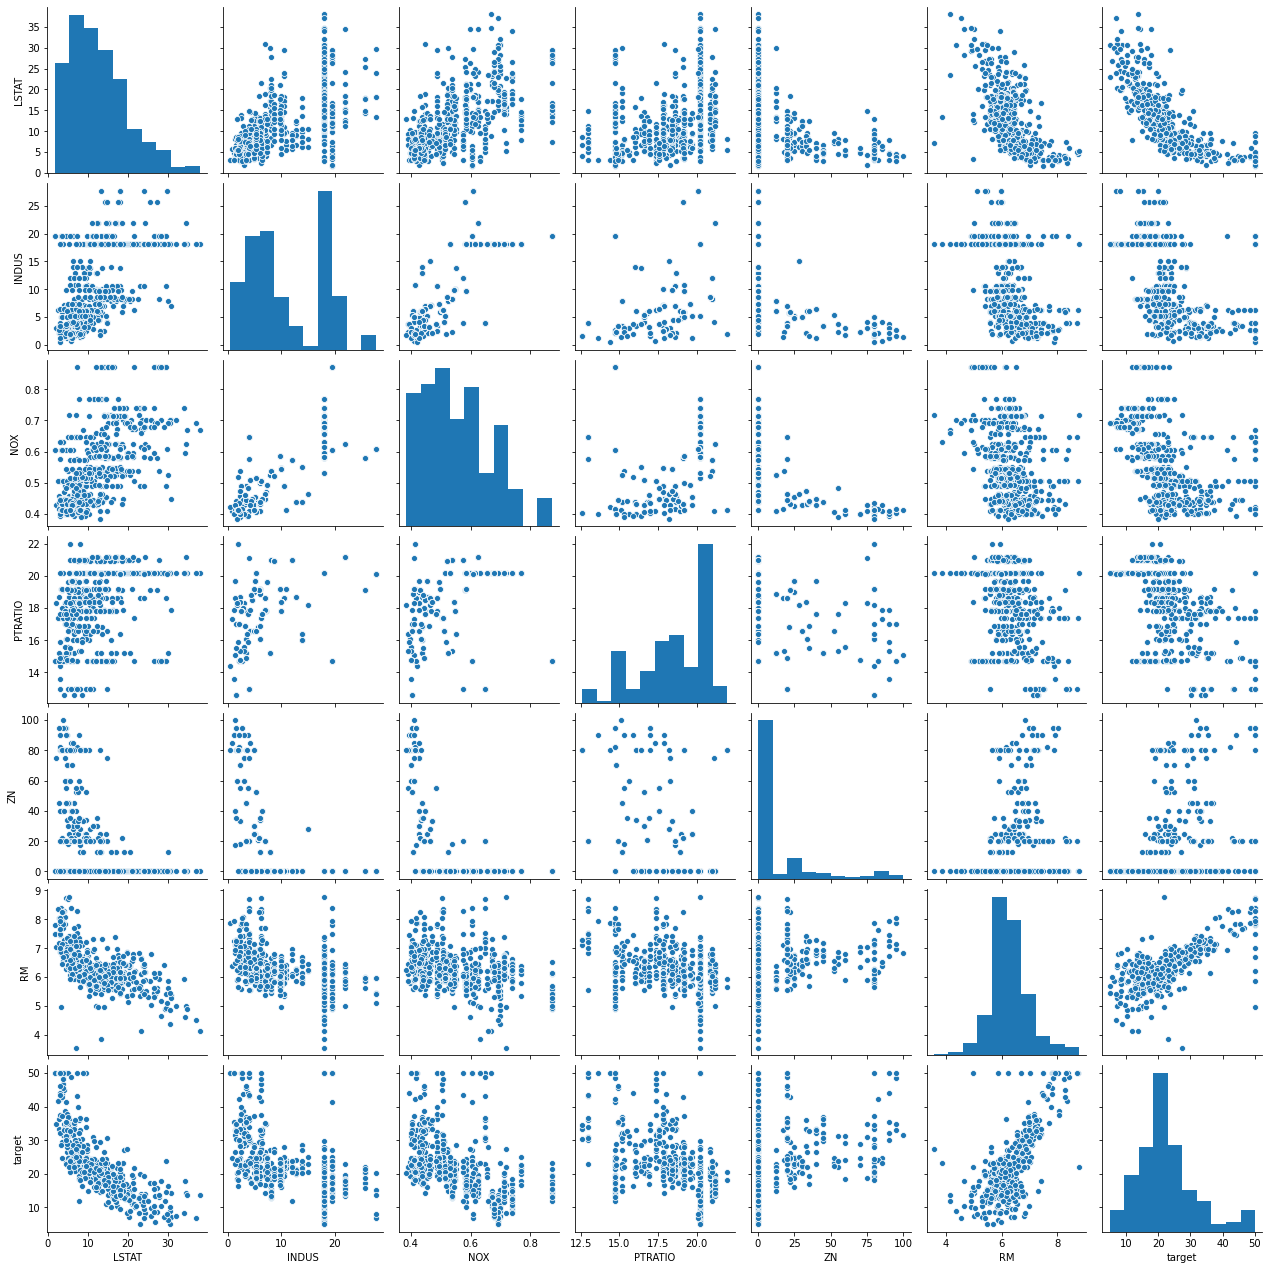

In [149]:
#Lets get a pair-plot first
cols=['LSTAT','INDUS','NOX','PTRATIO','ZN','RM','target']
sns.pairplot(df[cols])

# Lets get a closer look at a few scatter plots and find the relationship between the target variable and the feature

Text(0, 0.5, 'target')

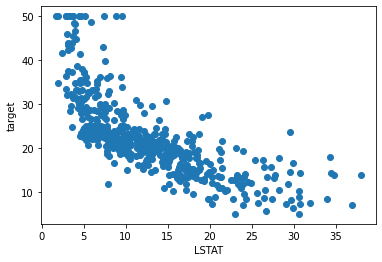

In [175]:
plt.scatter(df.LSTAT,target)
plt.xlabel("LSTAT")
plt.ylabel("target")

There is an inverse relationship between LSTAT and the target value which makes sense. As the lower status percentage increases, the value of the housing decreases(rich neighborhood vs poor neighborhood)

Text(0, 0.5, 'target')

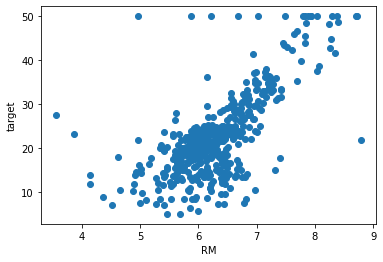

In [176]:
plt.scatter(df.RM,target)
plt.xlabel("RM")
plt.ylabel("target")

There is a linear relationship between RM and the target variable. As the average number of rooms per dwelling increases, so does the price of the housing which makes sense

Text(0, 0.5, 'target')

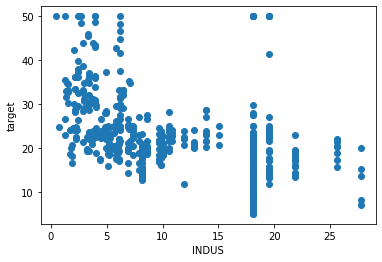

In [177]:
plt.scatter(df.INDUS,target)
plt.xlabel("INDUS")
plt.ylabel("target")

There is not a signfican relationship between INDUS and the target variable but there is a slight inverse relationship. As the proportion of non-retail business acres per town increases, the value of the housing decreases. This means that where there are lower grocery stores and other retail businesses, the value of the housing decreases which makes sense

Text(0, 0.5, 'target')

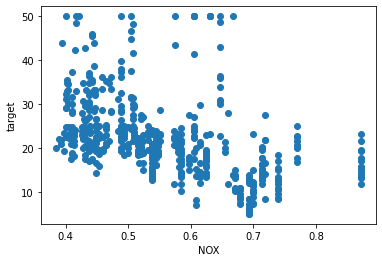

In [178]:
plt.scatter(df.NOX,target)
plt.xlabel("NOX")
plt.ylabel("target")

There is a significant relationship betweeen NOX and the target value. There is a slight inverse relationship. As the nitrous oxide concentrate increases, the value of the housing decreases since no one wants to live in an area with poor air quality which can lead to diseases

Text(0, 0.5, 'target')

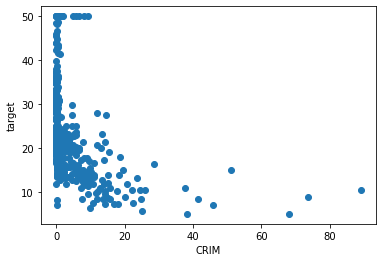

In [182]:
plt.scatter(df.CRIM,target)
plt.xlabel("CRIM")
plt.ylabel("target")

There is an inverse relationship between CRIM and the target value which makes sense. Although the crime rate in Boston is pretty low, between the 0 and 20 range, the lower the crime-rate the higher the value of the housing which makes sense. No one likes crime lol

Text(0, 0.5, 'LSTAT')

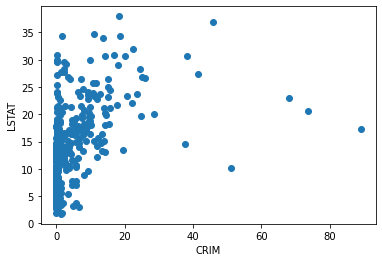

In [184]:
plt.scatter(df.CRIM,df.LSTAT)
plt.xlabel("CRIM")
plt.ylabel("LSTAT")

Linear relationship between CRIM and LSTAT especially between the 0-20 range. This means that in poorer neighborhoods, more people are bound to commit crime which makes sense.

Text(0, 0.5, 'RM')

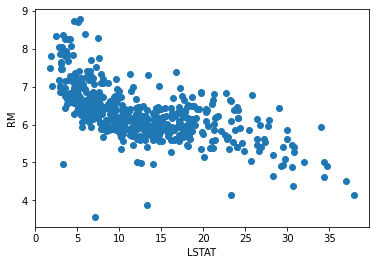

In [179]:
plt.scatter(df.LSTAT,df.RM)
plt.xlabel("LSTAT")
plt.ylabel("RM")

There is an inverse relationship betweeen LSTAT and RM. This makes sense because in poorer neighborhood, the average number of rooms per dwelling decreases since poor people cant afford to live in bigger houses

Text(0, 0.5, 'NOX')

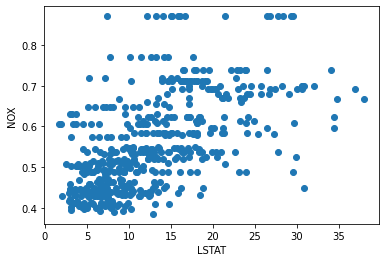

In [180]:
plt.scatter(df.LSTAT,df.NOX)
plt.xlabel("LSTAT")
plt.ylabel("NOX")

There is a linear relationsip between LSTAT and NOX. This means that in poorer neighborhoods, the air quality is worse compared to rich neighborhoods

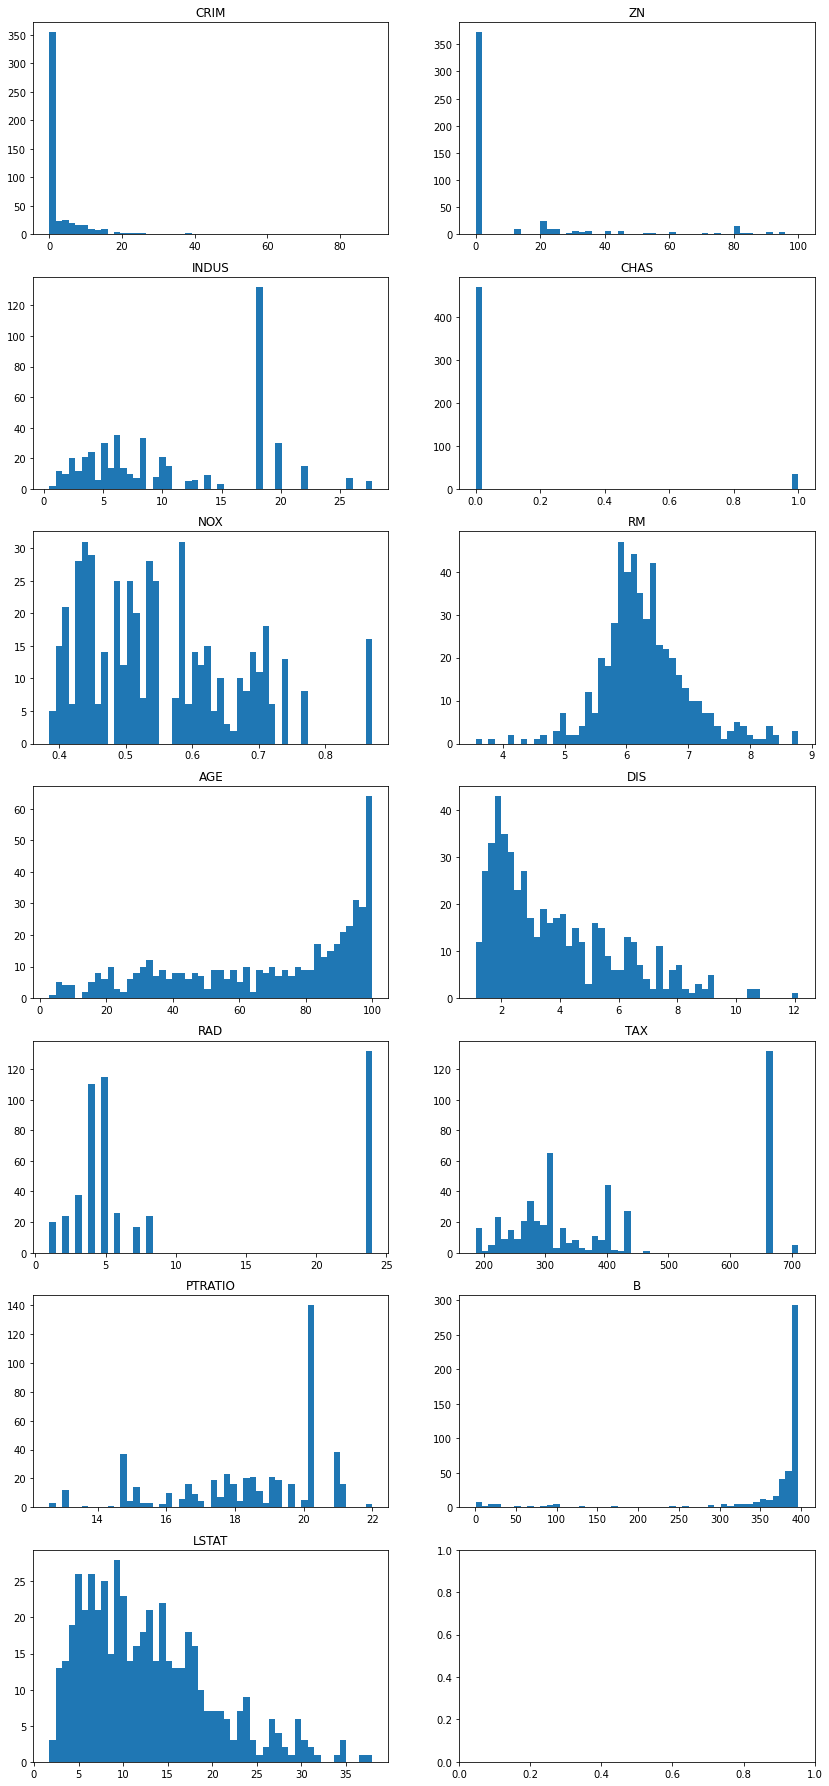

In [119]:
#Create histograms for each Column
figure, ax = plt.subplots(nrows=7, ncols=2, figsize=(14,32))
counter=0
for row in range(7):
    for col in range(2):
        if counter<len(df.columns):
            ax[row][col].hist(df[df.columns[counter]],bins=50)
            ax[row][col].set_title(df.columns[counter])
            counter+=1

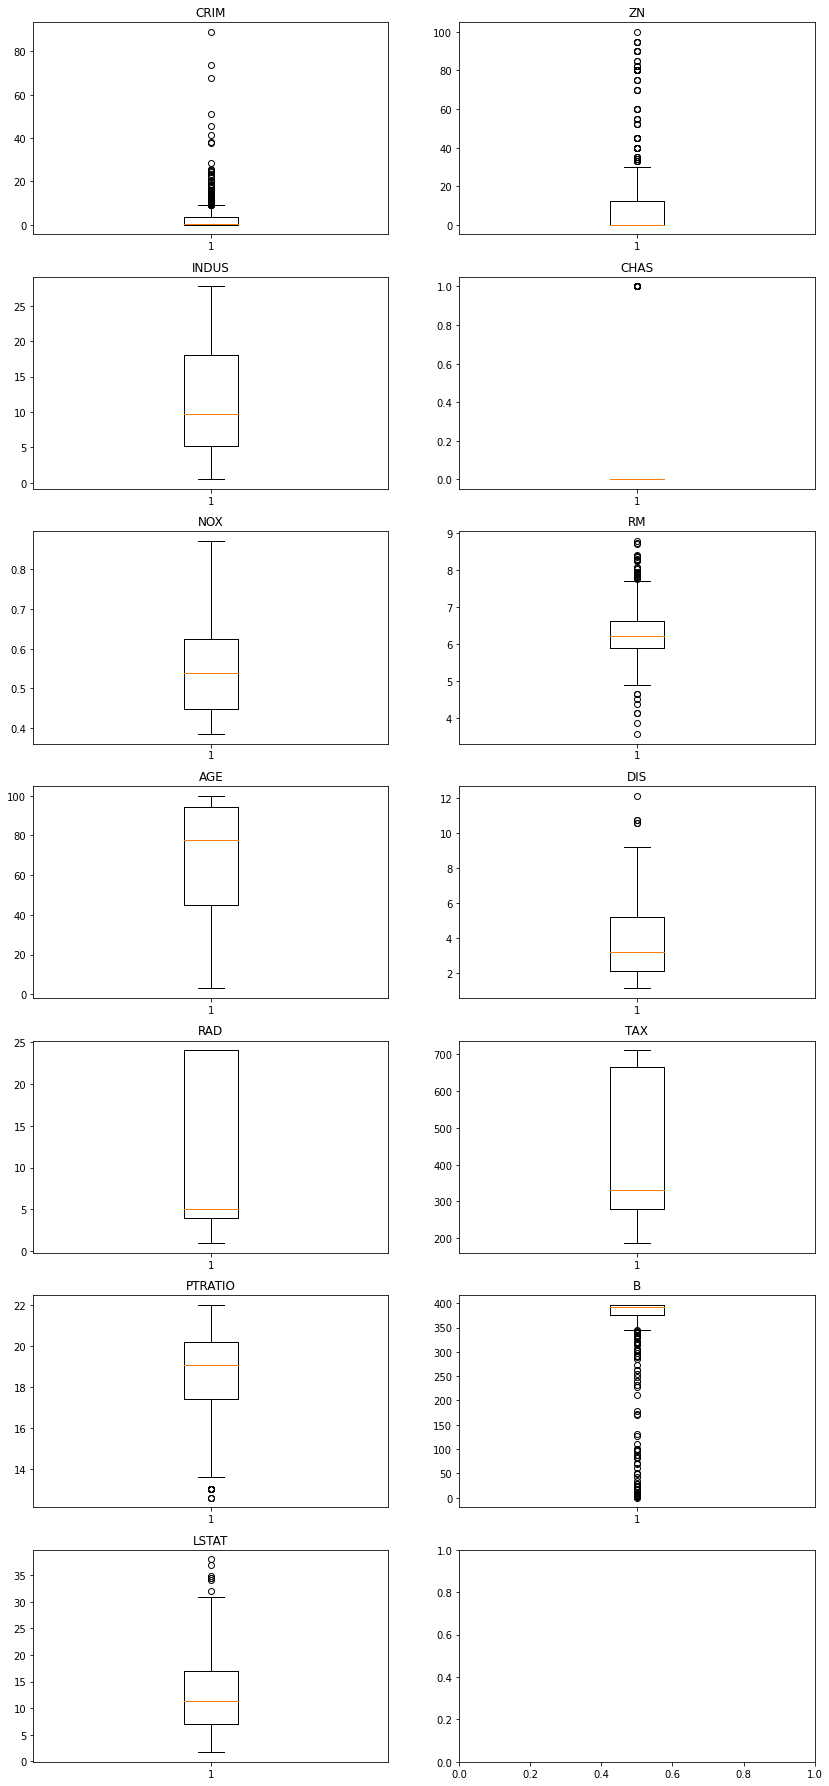

In [120]:
#Lets make look at boxplots for each column
figure, ax = plt.subplots(nrows=7, ncols=2, figsize=(14,32))
counter=0
for row in range(7):
    for col in range(2):
        if counter<len(df.columns):
            ax[row][col].boxplot(df[df.columns[counter]])
            ax[row][col].set_title(df.columns[counter])
            counter+=1

According to our histograms and boxplots for each column: the main outliers to watch for are RM and DIS. Since MDEV is the target variable, we will not remove any outliers for that. To remove outliers, I can use the zscore method and keep all values within 3 STD from the mean or decide to use the IQR method.Since not all histograms are normally distibuted it is best to use the IQR method for now.

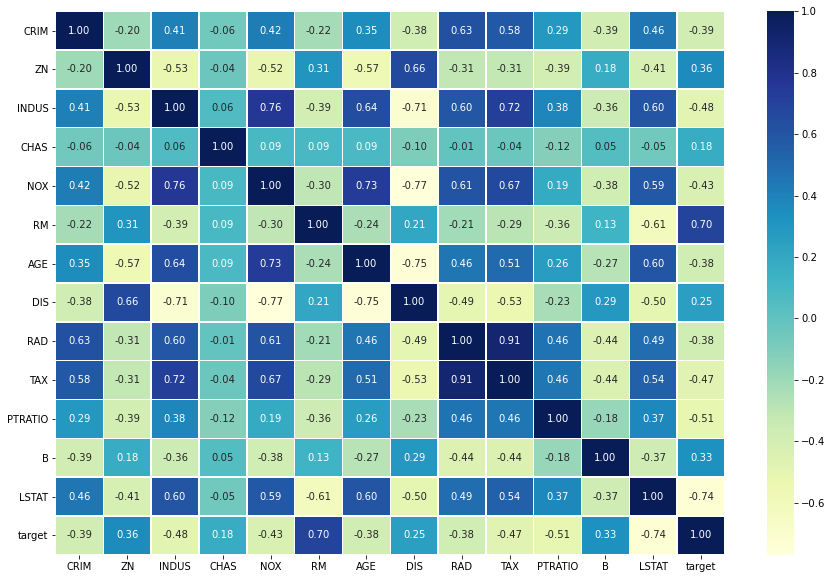

In [145]:
#Get a correlation matrix and see how the values are related to each other
df["target"]=y
corr_matrix=df.corr()
fig , ax=plt.subplots(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, linewidth=0.5, fmt="0.2f", cmap="YlGnBu")

In [126]:
def removing_outliers(data_column):
    sorted(data_column)
    q3, q1= np.percentile(df[x],[75 ,25])
    iqr=q3-q1
    upper_range=q3+(1.5*iqr)
    lower_range=q1-(1.5*iqr)
    return upper_range, lower_range

In [130]:
#Testing it out for the CRIM column
upper_range, lower_range=removing_outliers(df["CRIM"])
print(upper_range), print(lower_range)

31.962500000000006
-8.057500000000005


(None, None)

In [ ]:
outlier_index=df[x][(df[x]<lower_range)|(df[x]>upper_range)].index

In [134]:
df[(df.CRIM<lower_range)|(df.CRIM>upper_range)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
380,88.9762,0.0,18.1,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21
398,38.3518,0.0,18.1,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.90,30.59
404,41.5292,0.0,18.1,0.0,0.693,5.531,85.4,1.6074,24.0,666.0,20.2,329.46,27.38
405,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98
410,51.1358,0.0,18.1,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11
414,45.7461,0.0,18.1,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98
418,73.5341,0.0,18.1,0.0,0.679,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62
427,37.6619,0.0,18.1,0.0,0.679,6.202,78.7,1.8629,24.0,666.0,20.2,18.82,14.52


In [ ]:
for x in df.columns:
    upper_range, lower_range=removing_outliers(df[x])
    outlier_index=df[x][(df[x]<lower_range)|(df[x]>upper_range)].index
    for y in 